# Neural Networks

### Predict kd/ki and values with categories

In [9]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import numpy as np
import warnings



In [21]:
warnings.filterwarnings("ignore")

data = pd.read_csv("class_values.csv", delimiter=',') # don't forget to change the name of the file and the variables according to the used file
Y = data[['value']]
X = data[['len_zip']]




[1 2 3 0]


In [10]:
## for kd/ki

num_folds = 10
nb_classe = len(Y['kd/ki'].unique())

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
f_nb = 1
scores_cv = []

model_nn = Sequential()
model_nn.add(Dense(32, input_dim=1, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(nb_classe, activation='softmax'))
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

for train, test in kfold.split(X, Y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = Y.iloc[train], Y.iloc[test]

    model_nn.fit(X_train, y_train, epochs=50, verbose=0)

    score = model_nn.evaluate(X_test, y_test, verbose=0)
    print(f"Fold number {f_nb}, accuracy score: {score[1]}")

    scores_cv.append(score[1])
    f_nb += 1

print('10-fold CV mean of scores:', np.mean(scores_cv))
print("\n with a standard deviation of %0.4f" % (np.array(scores_cv).std()))




Fold number 1, accuracy score: 0.5228346586227417
Fold number 2, accuracy score: 0.5748031735420227
Fold number 3, accuracy score: 0.5480315089225769
Fold number 4, accuracy score: 0.5133858323097229
Fold number 5, accuracy score: 0.5511810779571533
Fold number 6, accuracy score: 0.5716535449028015
Fold number 7, accuracy score: 0.5763779282569885
Fold number 8, accuracy score: 0.5149606466293335
Fold number 9, accuracy score: 0.5149606466293335
Fold number 10, accuracy score: 0.5552050471305847
10-fold CV mean of scores: 0.544339406490326

 with a standard deviation of 0.0245


In [22]:
## For Values ###

num_folds = 10
nb_classe = len(Y['value'].unique())

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
f_nb = 1
scores_cv = []

model_nn = Sequential()
model_nn.add(Dense(32, input_dim=1, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(nb_classe, activation='softmax'))
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

for train, test in kfold.split(X, Y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = Y.iloc[train], Y.iloc[test]

    model_nn.fit(X_train, y_train, epochs=50, verbose=0)

    score = model_nn.evaluate(X_test, y_test, verbose=0)
    print(f"Fold number {f_nb}, accuracy score: {score[1]}")

    scores_cv.append(score[1])
    f_nb += 1

print('10-fold CV mean of scores:', np.mean(scores_cv))
print("\n with a standard deviation of %0.4f" % (np.array(scores_cv).std()))


Fold number 1, accuracy score: 0.8204724192619324
Fold number 2, accuracy score: 0.8314960598945618
Fold number 3, accuracy score: 0.85196852684021
Fold number 4, accuracy score: 0.869291365146637
Fold number 5, accuracy score: 0.8551180958747864
Fold number 6, accuracy score: 0.8110235929489136
Fold number 7, accuracy score: 0.8299212455749512
Fold number 8, accuracy score: 0.8425197005271912
Fold number 9, accuracy score: 0.8440945148468018
Fold number 10, accuracy score: 0.85173499584198
10-fold CV mean of scores: 0.8407640516757965

 with a standard deviation of 0.0167


### Predict "values"  without categories

In [ ]:
data = pd.read_csv("LP_PDBBind.csv", delimiter=',')

data_kd = data[data['kd/ki'].str.contains('Kd', case=False, na=False)] # we choose columns with only Kd

Y = data_kd[['value']]
X = data_kd[['smiles','seq']]

X['smiles'] = X['smiles'].astype(str)
X['smiles+seq'] = X['smiles'] + X['seq']

# create the concataneted columns
X_concat = X[['smiles+seq']]
X_concat['smiles+seq'] = X_concat['smiles+seq'].apply(lambda x:len(gzip.compress(x.encode())))

X_train, X_test, y_train, y_test =train_test_split(X_concat, Y, test_size=0.3) # 70% training and 30% test


In [ ]:
model_v = Sequential()
model_v.add(Dense(32, input_dim=1, activation='relu'))
model_v.add(Dense(32, activation='relu'))
model_v.add(Dense(32, activation='relu'))
model_v.add(Dense(1, activation='linear'))
model_v.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_v.fit(X_train, y_train, epochs=50)

y_pred = model_v.predict(X_test)



Epoch 1/50
154/154 [==============================] - 1s 2ms/step - loss: 9.0051 - mae: 2.2831
Epoch 2/50
154/154 [==============================] - 0s 2ms/step - loss: 7.7623 - mae: 2.1387
Epoch 3/50
154/154 [==============================] - 0s 2ms/step - loss: 6.9758 - mae: 2.0099
Epoch 4/50
154/154 [==============================] - 0s 2ms/step - loss: 5.6806 - mae: 1.8296
Epoch 5/50
154/154 [==============================] - 0s 2ms/step - loss: 5.1609 - mae: 1.7346
Epoch 6/50
154/154 [==============================] - 0s 2ms/step - loss: 4.8605 - mae: 1.6999
Epoch 7/50
154/154 [==============================] - 0s 2ms/step - loss: 4.4957 - mae: 1.6454
Epoch 8/50
154/154 [==============================] - 0s 2ms/step - loss: 4.0429 - mae: 1.5547
Epoch 9/50
154/154 [==============================] - 0s 2ms/step - loss: 4.0297 - mae: 1.5585
Epoch 10/50
154/154 [==============================] - 0s 2ms/step - loss: 3.5934 - mae: 1.4865
Epoch 11/50
154/154 [============================

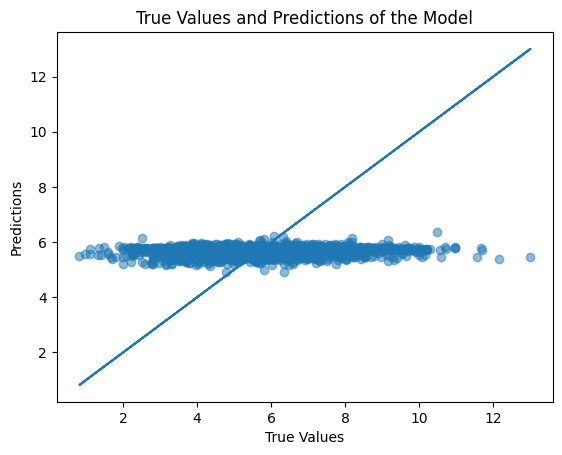

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test,y_test)
plt.title('True Values and Predictions of the Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()